In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving toyota.csv to toyota (1).csv


In [ ]:
dados = pd.read_csv('toyota.csv')

In [ ]:
dados.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
dados.shape

(6738, 8)

In [ ]:
dados.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
mpg             float64
engineSize      float64
dtype: object

In [ ]:
#dados1 = tabela sem a coluna mpg
dados1 = dados.drop('tax',axis=1)
dados1.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


In [ ]:
dados1 = dados.drop('mpg',axis=1)
dados1.head()

,model,year,price,transmission,mileage,fuelType,tax,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,2.0


In [ ]:
dados1.describe()

,year,price,mileage,tax,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,0.436159
min,1998.000000,850.000000,2.000000,0.000000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,4.500000


In [ ]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   engineSize    6738 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 421.2+ KB


In [ ]:
dados1['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [ ]:
dados['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [ ]:
dados['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [ ]:
dados1['model'] = dados1['model'].replace(' Avensis', 0)
dados1['model'] = dados1['model'].replace(' Aygo', 1)
dados1['model'] = dados1['model'].replace(' C-HR', 2)
dados1['model'] = dados1['model'].replace(' Camry', 3)
dados1['model'] = dados1['model'].replace(' Corolla', 4)
dados1['model'] = dados1['model'].replace(' GT86', 5)
dados1['model'] = dados1['model'].replace(' Hilux', 6)
dados1['model'] = dados1['model'].replace(' IQ', 7)
dados1['model'] = dados1['model'].replace(' Land Cruiser', 8)
dados1['model'] = dados1['model'].replace(' PROACE VERSO', 9)
dados1['model'] = dados1['model'].replace(' Prius', 10)
dados1['model'] = dados1['model'].replace(' RAV4', 11)
dados1['model'] = dados1['model'].replace(' Supra', 12)
dados1['model'] = dados1['model'].replace(' Urban Cruiser', 13)
dados1['model'] = dados1['model'].replace(' Verso', 14)
dados1['model'] = dados1['model'].replace(' Verso-S', 15)
dados1['model'] = dados1['model'].replace(' Yaris', 16)
dados1['model'] = dados1['model'].replace(' Auris', 17)
dados1['transmission'] = dados1['transmission'].replace('Manual', 1)
dados1['transmission'] = dados1['transmission'].replace('Automatic', 2)
dados1['transmission'] = dados1['transmission'].replace('Semi-Auto', 3)
dados1['transmission'] = dados1['transmission'].replace('Other', 4)
dados1['fuelType'] = dados1['fuelType'].replace('Petrol', 1)
dados1['fuelType'] = dados1['fuelType'].replace('Other', 2)
dados1['fuelType'] = dados1['fuelType'].replace('Hybrid', 3)
dados1['fuelType'] = dados1['fuelType'].replace('Diesel', 4)

In [ ]:
dados1.head()

,model,year,price,transmission,mileage,fuelType,tax,engineSize
0,5,2016,16000,1,24089,1,265,2.0
1,5,2017,15995,1,18615,1,145,2.0
2,5,2015,13998,1,27469,1,265,2.0
3,5,2017,18998,1,14736,1,150,2.0
4,5,2017,17498,1,36284,1,145,2.0


In [ ]:
#X = variavel preditora
X = dados1[['model', 'year', 'transmission','mileage']]
X.head()

,model,year,transmission,mileage
0,5,2016,1,24089
1,5,2017,1,18615
2,5,2015,1,27469
3,5,2017,1,14736
4,5,2017,1,36284


In [ ]:
#y variável de resposta
y = dados1['price']
y.head()

0    16000
1    15995
2    13998
3    18998
4    17498
Name: price, dtype: int64

In [ ]:
#Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [ ]:
#criando modelo preditor
from sklearn.linear_model import LinearRegression


In [ ]:
modelopreditor = LinearRegression()

In [ ]:
#aqui ocorre o aprendizado
modelopreditor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Imprimindo os coeficientes com os nomes das colunas
coeff = pd.DataFrame(modelopreditor.coef_,X.columns, columns = ['Coeficiente'])
coeff

,Coeficiente
model,31.820689
year,1260.401204
transmission,5322.262565
mileage,0.005260


In [ ]:
# fazendo predições com os dados de teste

predictions = modelopreditor.predict(X_test)

In [ ]:
# imprimindo as primeiras variáveis preditoras

X_test.head()

,model,year,transmission,mileage
1603,16,2017,2,17250
5725,2,2018,2,11819
2088,16,2017,2,21916
2501,16,2012,1,37294
3639,16,2016,2,33430


In [ ]:
# predições realizadas
predictions

array([15862.49924374, 16648.84393587, 15887.04223105, ...,
       13380.64160216,  6842.61379199, 17080.37364676])

In [ ]:
# valores reais para acertar

y_test.head()

1603    12495
5725    21888
2088    11326
2501     5495
3639    15495
Name: price, dtype: int64

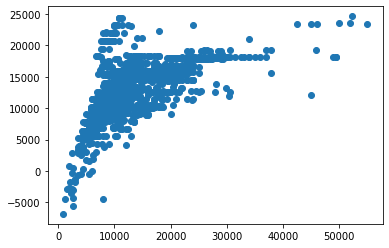

In [ ]:
plt.scatter(y_test, predictions)
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3381.254956724954
MSE: 23416441.4457116
RMSE: 4839.053775864823
